In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\techg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\techg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### Data Loading

In [6]:
column_name = ['tweet_id','entity','sentiment','tweet_content']

In [7]:
df = pd.read_csv('twitter_training.csv',names = column_name,header = None)

In [8]:
df.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
df_val = pd.read_csv('twitter_validation.csv',names = column_name,header = None)

In [10]:
df_val.head()

,tweet_id,entity,sentiment,tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


### Data Cleaning

In [11]:
### Removing Null Values

In [12]:
df.isnull().sum()

tweet_id           0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [13]:
df = df.dropna()
df.isnull().sum()

tweet_id         0
entity           0
sentiment        0
tweet_content    0
dtype: int64

In [14]:
df_duplicates = df.duplicated().sum()
print(df_duplicates)

2340


In [15]:
### Removing Duplicate values
df = df.drop_duplicates()
df_remove_duplicates = df.duplicated().sum()
print(df_remove_duplicates)

0


[Text(0.5, 1.0, 'Distribution of tweet content length')]

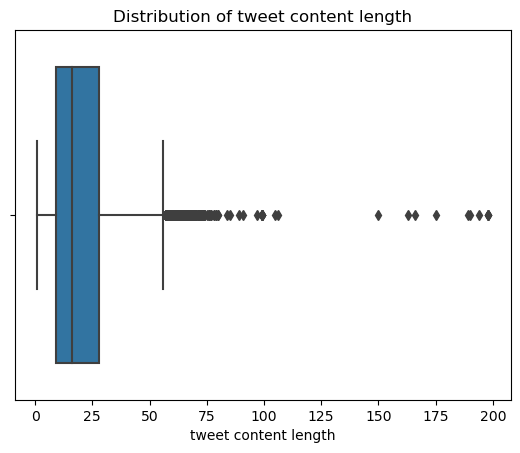

In [16]:
#Identify outliners on tweet content length
df["tweet content length"] = df["tweet_content"].map(lambda x:len(x.split(" ")))
sns.boxplot(x="tweet content length",data=df).set(title='Distribution of tweet content length')

In [17]:
#Using Outlier Formula to remove rows

lower_quartile = np.percentile(df["tweet content length"],25) #Calculating lower_quartile
median = np.percentile(df["tweet content length"],50) #Calculating median
upper_quartile = np.percentile(df["tweet content length"],75) #Calculating upper_quartile

interquartile_range = upper_quartile - lower_quartile #Calculating interquartile_range(IQR)
lower_boundary = lower_quartile - 1.5*interquartile_range #Calculating lower_boundary
upper_boundary = upper_quartile + 1.5*interquartile_range #Calculating upper_boundary

#tweet content length smaller than lower_boundary or larger than upper_boundary will be removed
print("lower_boundary:",lower_boundary)
print("upper_boundary:",upper_boundary)

lower_boundary: -19.5
upper_boundary: 56.5


In [18]:
removed_df = df[(df["tweet content length"]>=lower_boundary) & (df["tweet content length"]<=upper_boundary)]

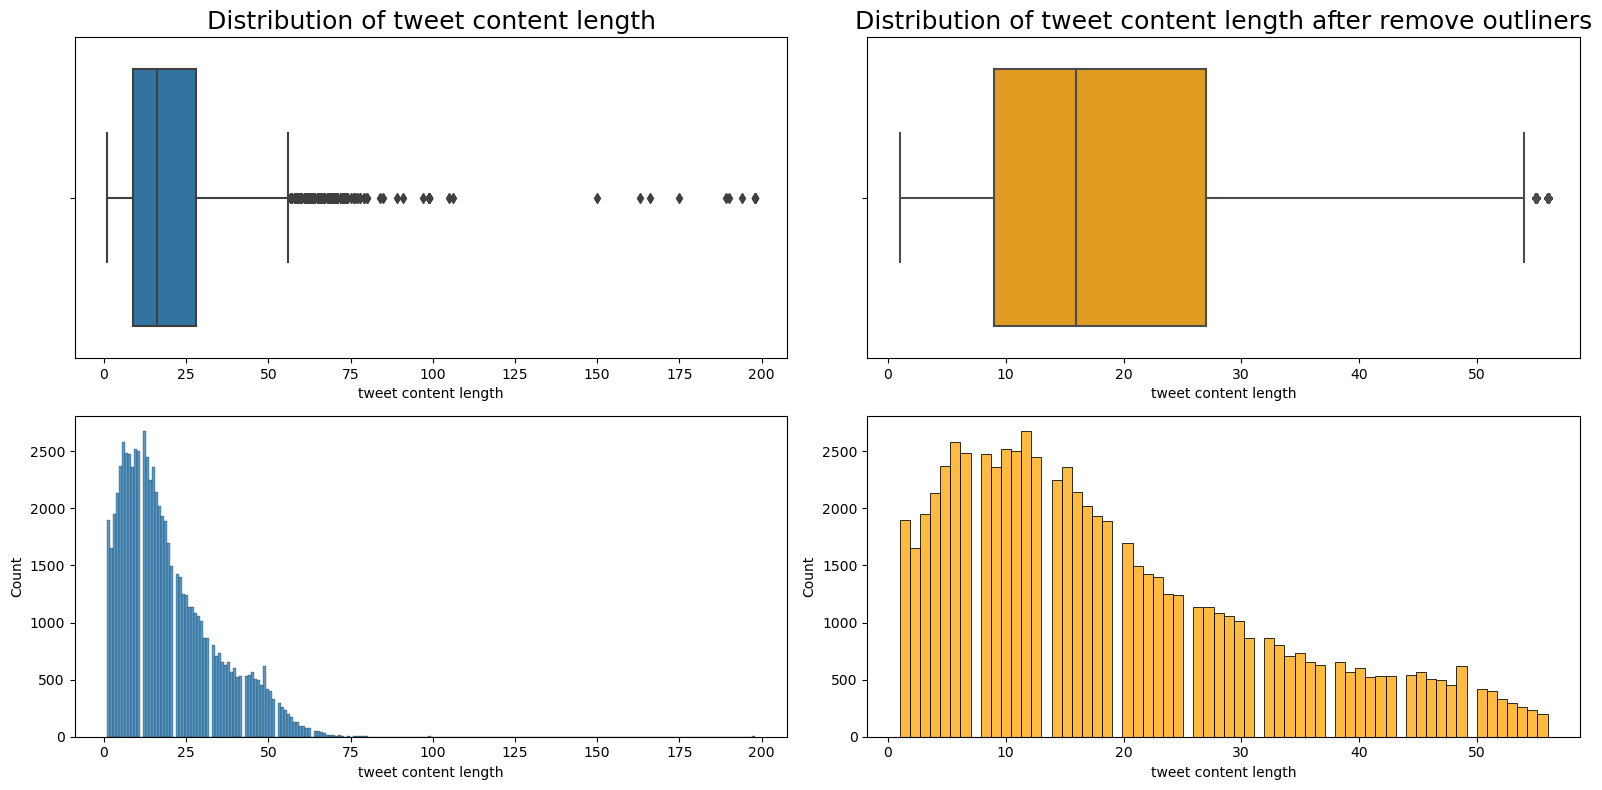

In [19]:
#Compare the distribution of tweet content length before and after remove outliers

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

#distribution of tweet content length
sns.boxplot(x="tweet content length",data=df,ax=ax[0,0]).set_title("Distribution of tweet content length",fontsize=18)
sns.boxplot(x="tweet content length",data=removed_df,ax=ax[0,1],color="orange").set_title("Distribution of tweet content length after remove outliners",fontsize=18)

#frequency of tweet content length
sns.histplot(x="tweet content length",data=df,ax=ax[1,0])
sns.histplot(x="tweet content length",data=removed_df,ax=ax[1,1],color="orange")
             
fig.tight_layout()

### Distribution of Labels after Data Cleaning

<AxesSubplot:xlabel='sentiment', ylabel='count'>

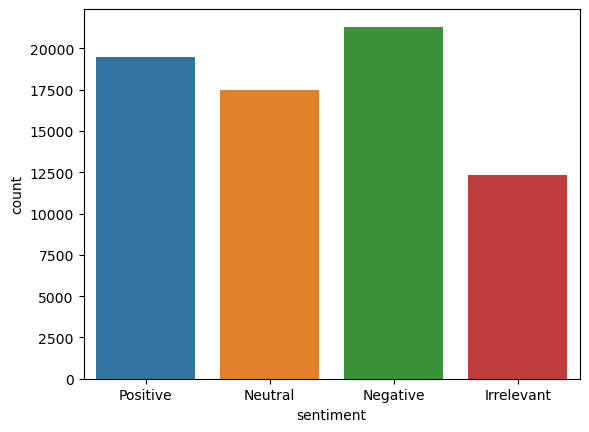

In [20]:
sns.countplot(x="sentiment",data=removed_df)

### EDA

In [21]:
### Frequency of words(wordcloud)

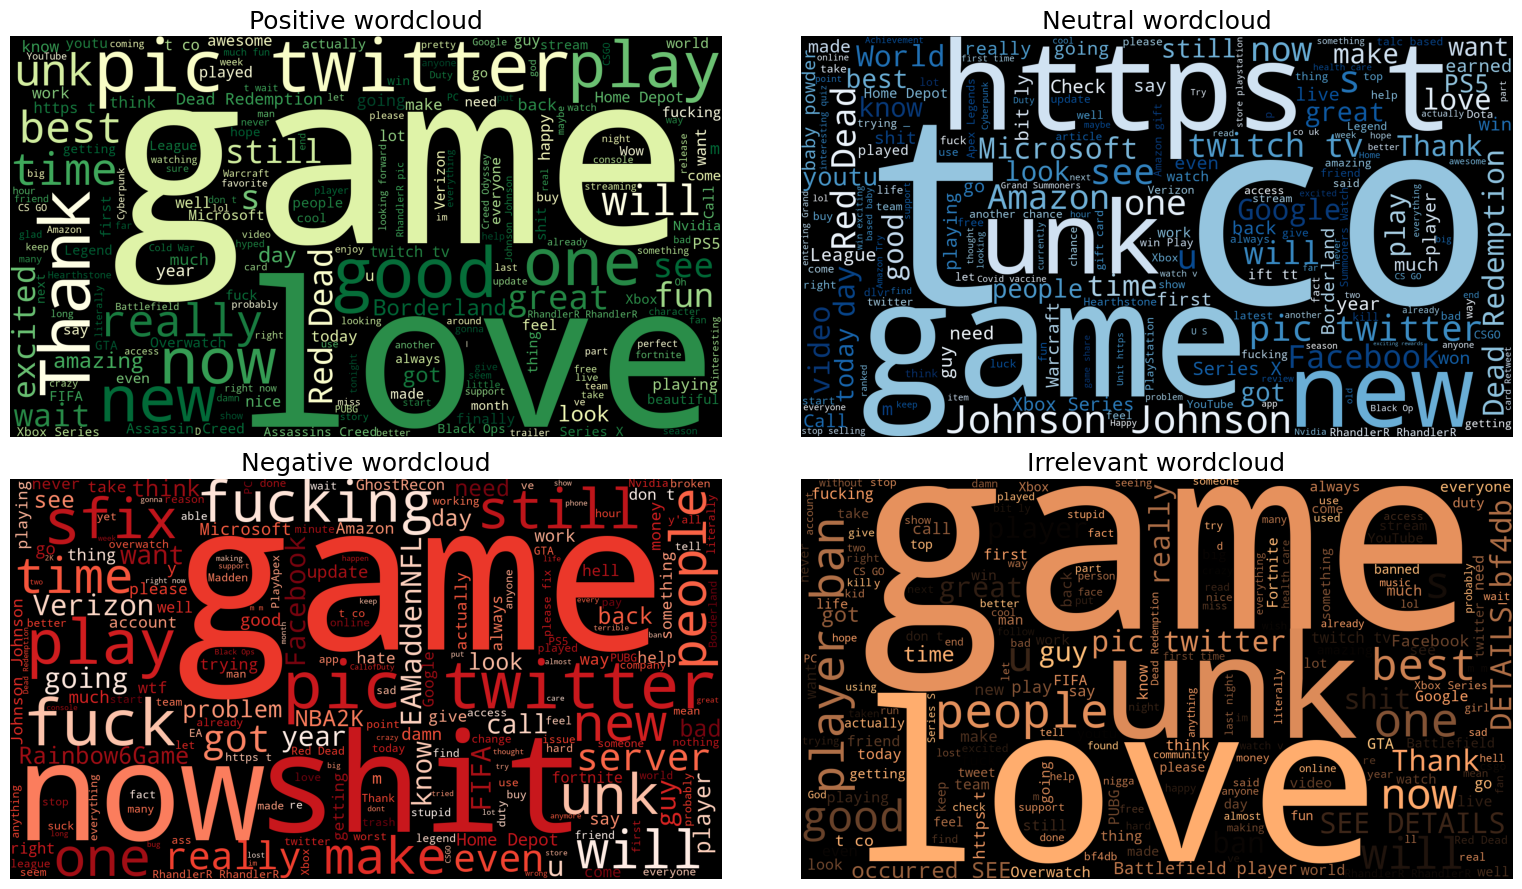

In [22]:
sentiment_list=["Positive","Neutral","Negative","Irrelevant"]
colormap_list=["YlGn_r","Blues_r","Reds_r","copper_r"]
ax_list = [[0,0],[0,1],[1,0],[1,1]]
stopwords_set = set(STOPWORDS)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
for sentiment,(row,col),colormap in zip(sentiment_list,ax_list,colormap_list):
    
    #Create wordcloud for each sentiment
    text = " ".join(content for content in removed_df[removed_df["sentiment"]==sentiment]["tweet_content"])
    wordcloud = WordCloud(colormap=colormap, stopwords=stopwords_set, width=1600, height=900).generate(text)
    
    #Plot wordcloud
    ax[row,col].imshow(wordcloud)
    ax[row,col].set_title(sentiment+" wordcloud", fontsize=18)
    ax[row,col].axis('off')
    
fig.tight_layout()

In [23]:
### Frequency of Entity

Text(0.5, 1.0, 'Frequency of entity')

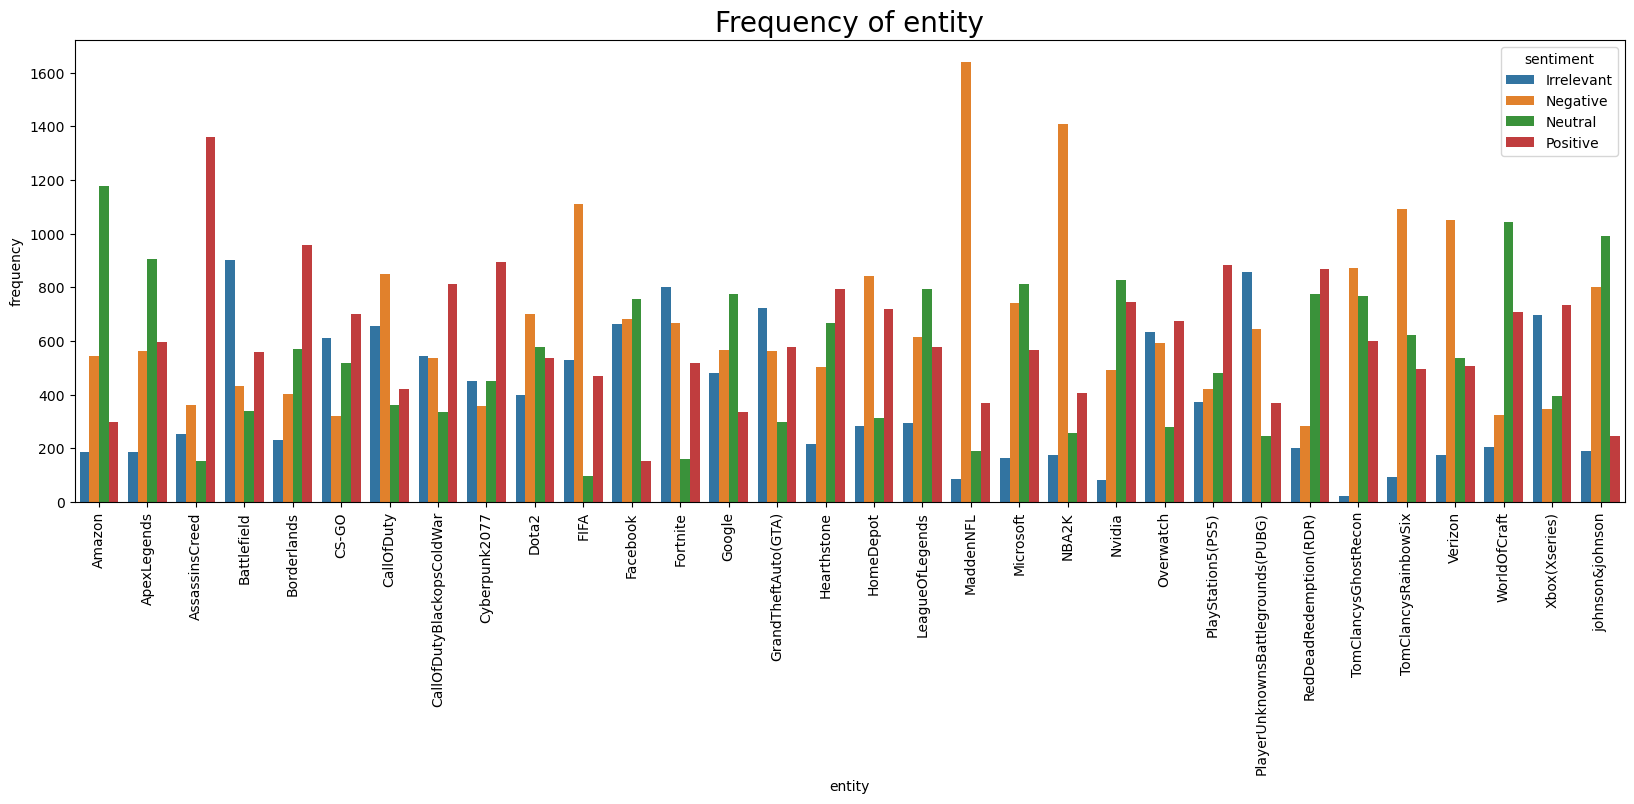

In [24]:
entity_frequency = removed_df.groupby(["sentiment","entity"]).size().reset_index()
entity_frequency.rename(columns={0: 'frequency'}, inplace=True)

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(data=entity_frequency,x="entity",y="frequency",hue="sentiment").set_title("Frequency of entity", fontsize=20)

### Data Splitting

In [25]:
#Split the training and validation dataset into x_train, y_train, x_test and y_test
x_train = df["entity"] + " " + df["tweet_content"]
y_train = df["sentiment"]
x_test = df_val["entity"] + " " + df_val["tweet_content"]
y_test = df_val["sentiment"]

In [26]:
x_train.head()

0    Borderlands im getting on borderlands and i wi...
1    Borderlands I am coming to the borders and I w...
2    Borderlands im getting on borderlands and i wi...
3    Borderlands im coming on borderlands and i wil...
4    Borderlands im getting on borderlands 2 and i ...
dtype: object

### Text Preprocessing

In [27]:
# function turns pos_tag into wordnet_pos
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [28]:
def text_preprocessing(text):
    
    #tokenize
    text_tokenize = word_tokenize(text)

    #split text and entity
    entity = text_tokenize[0]
    text_content = text_tokenize[1:]

    #pos tagging
    text_pos = pos_tag(text_content)
        
    #remove punctuation and stopwords
    remove_words = set(list(string.punctuation) + stopwords.words('english'))    
    text_remove = [(word,pos) for (word,pos) in text_pos if word not in remove_words]
    
    #lemmaization
    word_lem = WordNetLemmatizer()   
    text_lem = [(word_lem.lemmatize(word,pos=get_wordnet_pos(pos)),pos) if get_wordnet_pos(pos) != None
                 else (word_lem.lemmatize(word),pos) for (word,pos) in text_remove]

    #combine text and entity
    text_lem.append((entity,))

    return text_lem

In [29]:
#test text_preprocessing
example_text = "Overwatch Overwatch is a wonderful game, even after so many years."
print("Original sentence: ", example_text)
print("After text_preprocessing: ", text_preprocessing(example_text))

Original sentence:  Overwatch Overwatch is a wonderful game, even after so many years.
After text_preprocessing:  [('Overwatch', 'NN'), ('wonderful', 'JJ'), ('game', 'NN'), ('even', 'RB'), ('many', 'JJ'), ('year', 'NNS'), ('Overwatch',)]


In [30]:
#Combine text_preprocessing, CountVectorizer and TfidfTransformer into pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocessing)),
    ('tfidf', TfidfTransformer())
])

#Apply pipeline to x_train and x_test
x_train_processed = pipeline.fit_transform(x_train)
x_test_processed = pipeline.transform(x_test)

In [31]:
classifier_used = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]

In [32]:
classifier_accuracy=[]

for classifier in classifier_used:
    
    fit = classifier.fit(x_train_processed, y_train)
    predict = fit.predict(x_test_processed)
    trainset_predict = fit.predict(x_train_processed)
    
    accuracy = accuracy_score(predict,y_test)
    trainset_accuracy = accuracy_score(trainset_predict,y_train)
    
    classifier_accuracy.append([classifier.__class__.__name__,accuracy,trainset_accuracy])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

In [33]:
classifier_result = pd.DataFrame(classifier_accuracy,columns=["classifier","accuracy","accuracy on trainset"]).sort_values(by='accuracy',ascending=False)
classifier_result

,classifier,accuracy,accuracy on trainset
1,KNeighborsClassifier,0.990,0.961915
3,RandomForestClassifier,0.976,0.986533
0,LogisticRegression,0.930,0.885048
2,DecisionTreeClassifier,0.907,0.986533
